## **Download required libraries**

In [1]:
!pip install gensim
!pip install pyLDAvis
!pip install whatthelang
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.9/786.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached cysignals-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Created wheel for whatthelang: filename=whatthelang-1.0.1-py3-none-any.whl size=789800 sha256=803ccc7e0616fdbb20195131d8a4210287f7211c6591725bc6e640b9d29ce94c
  Stored in directory: /root/.cache/pip/wheels/e0/f7/2e/238a9063d3acf4bbbf069443e79285ce65fc1ffb1e81380114
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp310-cp310-linux_x86_64.whl size=2033631 sha256=8a76da3eef6329ba5d0e68f8775291bfb015f8e87cd3c2e19e3c04e087e470cd
  Stored in directory: /root/.cache/pip/wheels/a1/1e/10/0df99679118ea1dfa664f0b4fd2b906344f885e278563ae341
Successfully built whatthelang py

## **Download stopwords from nltk**

## **Import required libraries**

In [2]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# vis
import pyLDAvis
import pyLDAvis.gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Data preprocessing**

In [3]:
import re
from whatthelang import WhatTheLang

wtl = WhatTheLang()

# Function to classify content as 'English' or 'Taglish'
def classify_language(text):
    predicted_lang = wtl.predict_lang(text)
    if predicted_lang == 'en':
        return 'English'
    elif predicted_lang == 'tl':
        return 'Taglish'
    else:
        return 'Taglish'  # Default to Taglish

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df.drop(columns=['Platform', 'Sentiment'])

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Apply the classification to the 'Content' column
df['Predicted_Language'] = df['Content'].map(classify_language)

english_df = df[df['Predicted_Language'] == 'English']
taglish_df = df[df['Predicted_Language'] == 'Taglish']

# Count the number of English and Taglish texts
language_counts = df['Predicted_Language'].value_counts()

# Print the number of English and Taglish texts
print("Language Count:")
print(language_counts)

# Remove all columns except content since it is not needed anymore
english_df = english_df.drop(columns='Predicted_Language')
taglish_df = taglish_df.drop(columns='Predicted_Language')

# Display the first few rows of the preprocessed data
print(english_df.head())
print(taglish_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:46: DeprecationWarning: invalid escape sequence '\.'
<>:46: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-3-f8a65bec8e79>:46: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


Language Count:
Predicted_Language
English    293
Taglish    143
Name: count, dtype: int64
                                             Content
0  the education system that ai will destroy will...
1  ai tool sare very helpful but you need to use ...
2  ai and teachers should join forces in a collab...
3  kids that learn how to use the ai will realize...
4  but here’s the thing if we embrace the ai how ...
                                               Content
225  ok sya nagbibigay ng idea at pang research mas...
227  kung aasa kayo sa ai to do school work kayo di...
229  nakakadismaya panahon ngayon mga kabataan ngay...
230  para sa akin i like ai to be a mainstream thin...
233  sobrang dali ng matuto ng students ngayon kami...


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


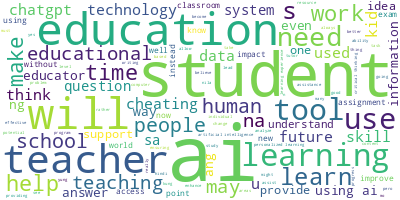

In [4]:
# ENGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(english_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


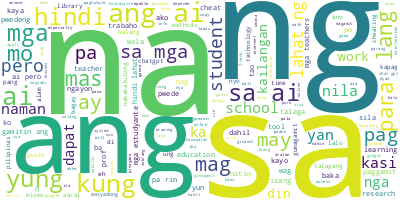

In [5]:
# TAGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(taglish_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

## **Data Preparation for LDA**

## **Lemmatization and removal of stopwords**

In [12]:
from tglstemmer import stemmer

lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# Function to process each document (tokenization, stopword removal, lemmatization, stemming)
def preprocess_doc(document):
    tokens = gensim.utils.simple_preprocess(str(document), deacc=True)  # Tokenization
    tokens = [token for token in tokens if token not in combined_stop_words]  # Stopword removal
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words]
    stemmed_tokens = [stemmer.get_stem(token) for token in tokens]  # Use stemmer for stemming
    return stemmed_tokens

# Convert the DataFrame content into a list of documents
english_data = english_df.values.tolist()
taglish_data = taglish_df.values.tolist()

english_processed_data = [preprocess_doc(doc) for doc in english_data]
taglish_processed_data = [preprocess_doc(doc) for doc in taglish_data]
processed_data = english_processed_data + taglish_processed_data

# Display the first 5 processed documents
print(english_processed_data[:5])
print(taglish_processed_data[:5])
print(processed_data[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai'], ['ai', 'tool', 'sare', 'helpful', 'need', 'use', 'properly', 'going', 'replace', 'hom', 'still', 'need', 'hom', 'touch'], ['ai', 'teacher', 'join', 'force', 'collaborative', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'empower', 'student', 'best'], ['kid', 'learn', 'use', 'ai', 'realize', 'career', 'obsolete', 'ai', 'take', 'smarter', 'path'], ['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']]
[['ok', 'sya', 'bigay', 'idea', 'pan', 'research', 'ma', 'dali', 'trabaho', 'bagay', 'hirap', 'research', 'pad', 'fact', 'check', 'nakakairita', 'studyante', 'blatant', 'chatgpt', 'assignment', 'essay'], ['asa', 'kayo', 'ai', 'school', 'work', 'kayo', 'disadvantaged', 'work'], ['dismaya', 'bata', 'asa', 'lang', 'ai', 'aral', 'talaga', 'libro'], ['like', 'ai', 'mainstream', 'thing', 'pilit', 'education', 'system', 'kas', 'laro', 'tukoy', 'sulat', 'ai', 't

## **Dictionary and corpus creation**

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Single-core training**


In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Display Topics**

In [ ]:
num_topics = lda_model.num_topics

# Print each topic with its top words
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=5)  # Get top 10 words for each topic
    print(f"Topic #{topic_id}:")
    print(", ".join([f"{word} ({round(weight, 4)})" for word, weight in topic_terms]))
    print()

Topic #0:
ai (0.055399999022483826), education (0.012400000356137753), student (0.011300000362098217), work (0.008899999782443047), tool (0.00839999970048666)

Topic #1:
ai (0.010900000110268593), kid (0.006099999882280827), education (0.00570000009611249), point (0.004900000058114529), use (0.004699999932199717)

Topic #2:
ai (0.05310000106692314), student (0.03610000014305115), learning (0.020600000396370888), teacher (0.015599999576807022), education (0.010599999688565731)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002425 -0.083048       1        1  43.917704
2     -0.089071  0.043197       2        1  43.758930
1      0.091496  0.039851       3        1  12.323366, topic_info=             Term        Freq       Total Category  logprob  loglift
128      learning   72.000000   72.000000  Default  30.0000  30.0000
25        student  157.000000  157.000000  Default  29.0000  29.0000
28            kid   14.000000   14.000000  Default  28.0000  28.0000
51           work   34.000000   34.000000  Default  27.0000  27.0000
231  personalized   17.000000   17.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
158        answer    2.339269   15.815127   Topic3  -5.9664   0.1825
203        future    2.351016   18.972764   Topic3  -5.9614   0.0055
26        teacher    2.405121   67.618827   Topic3  -5.9386  -1.2426
29          learn    2.350178   30.356732   Topic3  -5.9617  -0.4649
101        school    2.350824   32.650174   Topic3  -5.9615  -0.5374

[229 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
137       1  0.846231        able
329       2  0.894720  accessible
2275      1  0.960506    advanced
52        2  0.647749   advantage
52        3  0.323874   advantage
...     ...       ...         ...
6         2  0.273956       world
6         3  0.182637       world
1758      3  0.553945     yumaman
1641      1  0.852010         yun
1641      3  0.121716         yun

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

## **Coherence Score**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.43318673357910087


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
